In [13]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [14]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [15]:
#matplotlib 패키지 한글 깨짐 처리 시작
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [16]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [17]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)
#매출 건수 한 건당 매출금액 컬럼 추가
data['건당 매출금액(단위:만원)'] = data['매출금액(단위:만원)']/data['매출건수']

In [18]:
data=pd.DataFrame(data)

In [19]:
#4개 품목 분류
data_t =data[(data['품목대분류명'] == 'e상품/서비스')|(data['품목대분류명'] == '전자')|(data['품목대분류명'] == '식품')|(data['품목대분류명'] == '여가/스포츠')]
data_t

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액(단위:만원),매출건수,건당 매출금액(단위:만원)
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,96.3789,29,3.323410
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,108.9360,54,2.017333
8,201903,15,전자,1510,가전,여성,20대,1인가구,서울특별시,강동구,길동,242.9276,17,14.289859
10,201903,20,여가/스포츠,2013,여행,남성,40대,신혼영유아가구,서울특별시,강동구,길동,111.9710,17,6.586529
12,201903,15,전자,1511,디지털,남성,40대,신혼영유아가구,서울특별시,강동구,길동,252.5664,17,14.856847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519287,202103,21,e상품/서비스,2110,o2o서비스,여성,60대 이상,노인가구,서울특별시,성북구,동소문동7가,38.5208,7,5.502971
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,141.1368,7,20.162400
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,138.6040,63,2.200063
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,32.7592,7,4.679886


In [20]:
data_s = data[data['품목대분류명'] == '여가/스포츠']
data_j = data[data['품목대분류명'] == '전자']
data_f = data[data['품목대분류명'] == '식품']
data_e = data[data['품목대분류명'] == 'e상품/서비스']

In [21]:
#서울특별시일 경우
data_s_s = data[(data['품목대분류명'] == '여가/스포츠')|(data['고객소재지_광역시도'] == '서울특별시')]
data_j_s = data[(data['품목대분류명'] == '전자')|(data['고객소재지_광역시도'] == '서울특별시')]
data_f_s = data[(data['품목대분류명'] == '식품')|(data['고객소재지_광역시도'] == '서울특별시')]
data_e_s = data[(data['품목대분류명'] == 'e상품/서비스')|(data['고객소재지_광역시도'] == '서울특별시')]

Text(0.5, 1.0, 'e상품/서비스')

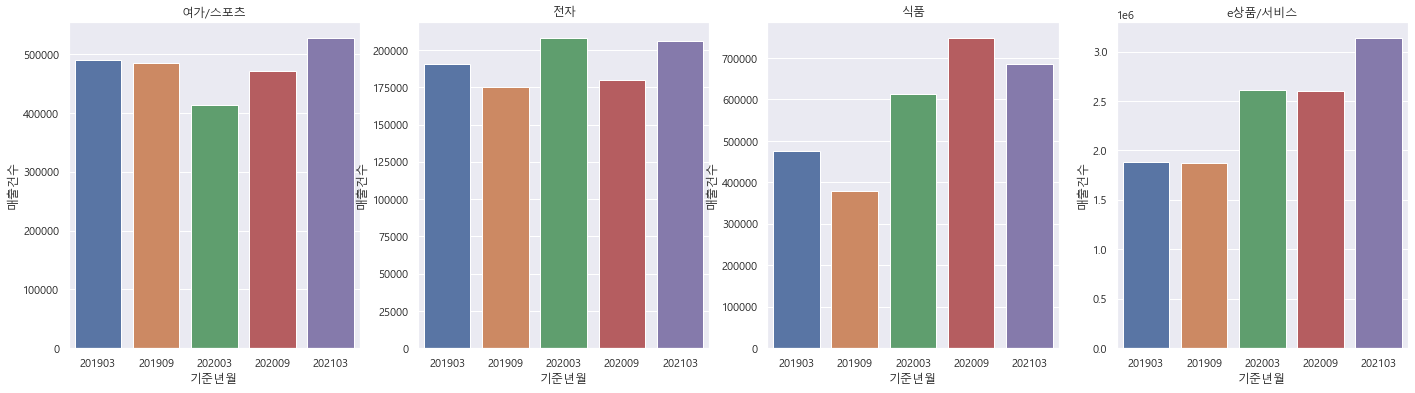

In [22]:
#매출건수에 대한 시각화
figure,((ax1,ax2,ax3,ax4))=plt.subplots(nrows=1,ncols=4)
figure.set_size_inches(24,6)
groupby_s = data_s['매출건수'].groupby(data_s['기준년월']).sum()
dfs = pd.DataFrame(groupby_s)
dfs.reset_index(inplace = True) 
f1=sns.barplot(x='기준년월',y='매출건수',data=dfs,ax=ax1)
f1.set_title("여가/스포츠")

groupby_j = data_j['매출건수'].groupby(data_j['기준년월']).sum()
dfj = pd.DataFrame(groupby_j)
dfj.reset_index(inplace = True) 
f2=sns.barplot(x='기준년월',y='매출건수',data=dfj,ax=ax2)
f2.set_title("전자")


groupby_f = data_f['매출건수'].groupby(data_f['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
f3=sns.barplot(x='기준년월',y='매출건수',data=dff,ax=ax3)
f3.set_title("식품")

groupby_e = data_e['매출건수'].groupby(data_e['기준년월']).sum()
dfe = pd.DataFrame(groupby_e)
dfe.reset_index(inplace = True) 
f4=sns.barplot(x='기준년월',y='매출건수',data=dfe,ax=ax4)
f4.set_title("e상품/서비스")

Text(0.5, 1.0, 'e상품/서비스')

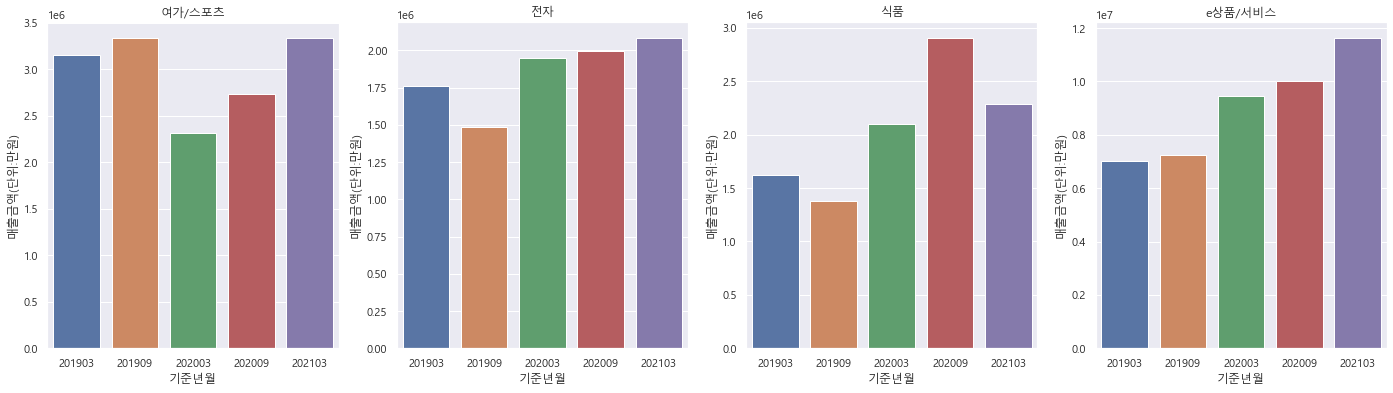

In [23]:
#매출금액에 대한 시각화
figure,((ax1,ax2,ax3,ax4))=plt.subplots(nrows=1,ncols=4)
figure.set_size_inches(24,6)
groupby_s = data_s['매출금액(단위:만원)'].groupby(data_s['기준년월']).sum()
dfs = pd.DataFrame(groupby_s)
dfs.reset_index(inplace = True) 
f1=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfs,ax=ax1)
f1.set_title("여가/스포츠")

groupby_j = data_j['매출금액(단위:만원)'].groupby(data_j['기준년월']).sum()
dfj = pd.DataFrame(groupby_j)
dfj.reset_index(inplace = True) 
f2=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfj,ax=ax2)
f2.set_title("전자")


groupby_f = data_f['매출금액(단위:만원)'].groupby(data_f['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
f3=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dff,ax=ax3)
f3.set_title("식품")

groupby_e = data_e['매출금액(단위:만원)'].groupby(data_e['기준년월']).sum()
dfe = pd.DataFrame(groupby_e)
dfe.reset_index(inplace = True) 
f4=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfe,ax=ax4)
f4.set_title("e상품/서비스")

In [27]:
#이상치 제거
def get_outlier(df = None, column = None, weight = 1.5):
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    iqr = quantile_75 - quantile_25
    iqr_weight  = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val =  quantile_75 + iqr_weight
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index
outlier_index_s = get_outlier(df = data_s, column= '매출금액(단위:만원)', weight= 1.5)
print(outlier_index_s)
data_s_copy = data_s.drop(outlier_index_s, axis = 0)

outlier_index_j = get_outlier(df = data_j, column= '매출금액(단위:만원)', weight= 1.5)
print(outlier_index_j)
data_j_copy = data_j.drop(outlier_index_j, axis = 0)

outlier_index_f = get_outlier(df = data_f, column= '매출금액(단위:만원)', weight= 1.5)
print(outlier_index_f)
data_f_copy = data_f.drop(outlier_index_f, axis = 0)

outlier_index_e = get_outlier(df = data_e, column= '매출금액(단위:만원)', weight= 1.5)
print(outlier_index_e)
data_e_copy = data_e.drop(outlier_index_e, axis = 0)

IndentationError: expected an indented block (<ipython-input-27-86c7819798c1>, line 3)

Text(0.5, 1.0, '이상치제거)e상품/서비스')

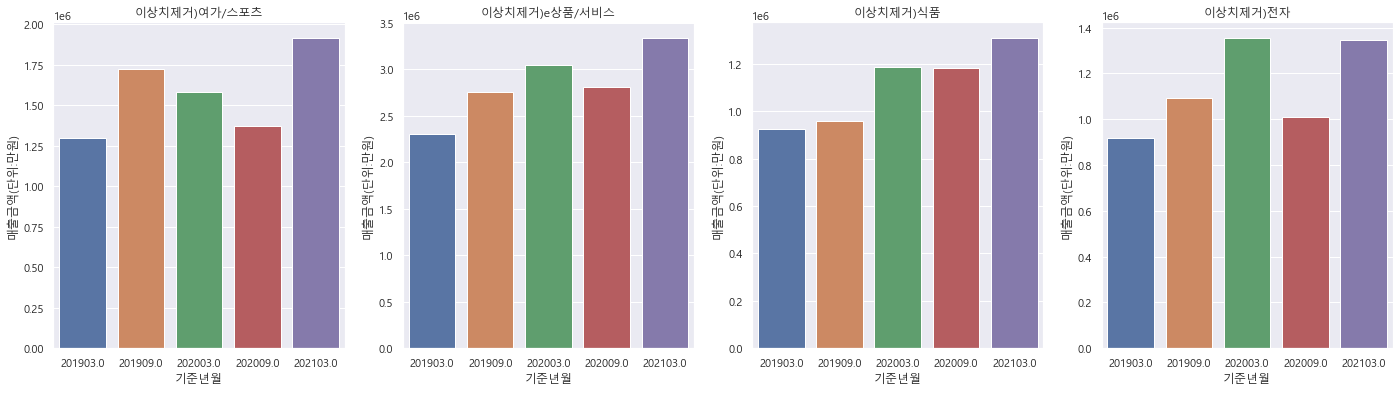

In [ ]:
figure,((ax1,ax2,ax3,ax4))=plt.subplots(nrows=1,ncols=4)
figure.set_size_inches(24,6)
groupby_s = data_s['매출금액(단위:만원)'].groupby(data_s_copy['기준년월']).sum()
dfs = pd.DataFrame(groupby_s)
dfs.reset_index(inplace = True) 
f1=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfs,ax=ax1)
f1.set_title("이상치제거)여가/스포츠")

groupby_j = data_j['매출금액(단위:만원)'].groupby(data_j_copy['기준년월']).sum()
dfj = pd.DataFrame(groupby_j)
dfj.reset_index(inplace = True) 
f2=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfj,ax=ax4)
f2.set_title("이상치제거)전자")


groupby_f = data_f['매출금액(단위:만원)'].groupby(data_f_copy['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
f3=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dff,ax=ax3)
f3.set_title("이상치제거)식품")

groupby_e = data_e['매출금액(단위:만원)'].groupby(data_e_copy['기준년월']).sum()
dfe = pd.DataFrame(groupby_e)
dfe.reset_index(inplace = True) 
f4=sns.barplot(x='기준년월',y='매출금액(단위:만원)',data=dfe,ax=ax2)
f4.set_title("이상치제거)e상품/서비스")

Text(0.5, 1.0, '이상치제거)e상품/서비스')

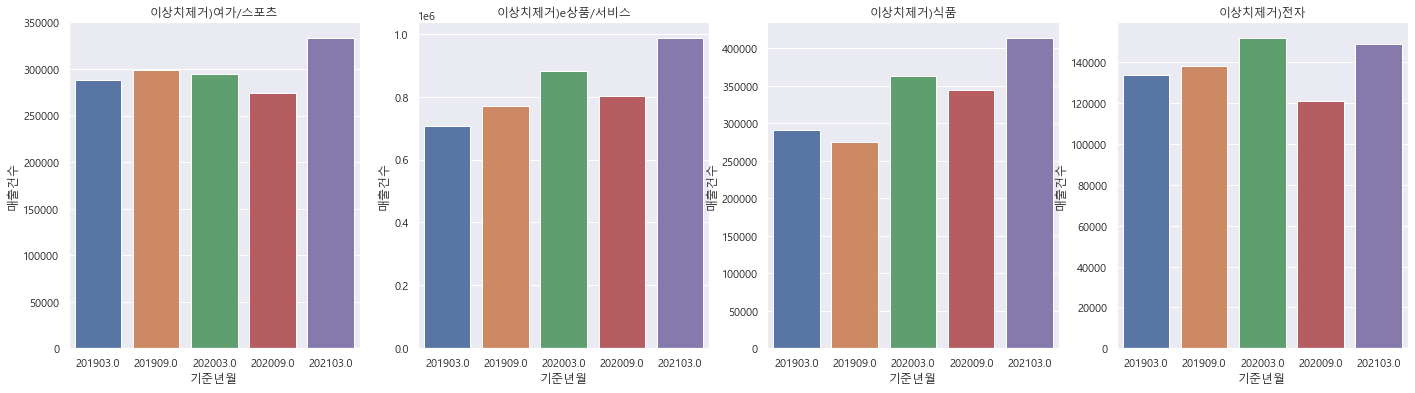

In [ ]:
figure,((ax1,ax2,ax3,ax4))=plt.subplots(nrows=1,ncols=4)
figure.set_size_inches(24,6)
groupby_s = data_s['매출건수'].groupby(data_s_copy['기준년월']).sum()
dfs = pd.DataFrame(groupby_s)
dfs.reset_index(inplace = True) 
f1=sns.barplot(x='기준년월',y='매출건수',data=dfs,ax=ax1)
f1.set_title("이상치제거)여가/스포츠")

groupby_j = data_j['매출건수'].groupby(data_j_copy['기준년월']).sum()
dfj = pd.DataFrame(groupby_j)
dfj.reset_index(inplace = True) 
f2=sns.barplot(x='기준년월',y='매출건수',data=dfj,ax=ax4)
f2.set_title("이상치제거)전자")


groupby_f = data_f['매출건수'].groupby(data_f_copy['기준년월']).sum()
dff = pd.DataFrame(groupby_f)
dff.reset_index(inplace = True) 
f3=sns.barplot(x='기준년월',y='매출건수',data=dff,ax=ax3)
f3.set_title("이상치제거)식품")

groupby_e = data_e['매출건수'].groupby(data_e_copy['기준년월']).sum()
dfe = pd.DataFrame(groupby_e)
dfe.reset_index(inplace = True) 
f4=sns.barplot(x='기준년월',y='매출건수',data=dfe,ax=ax2)
f4.set_title("이상치제거)e상품/서비스")

<AxesSubplot:xlabel='largecategory', ylabel='countsum'>

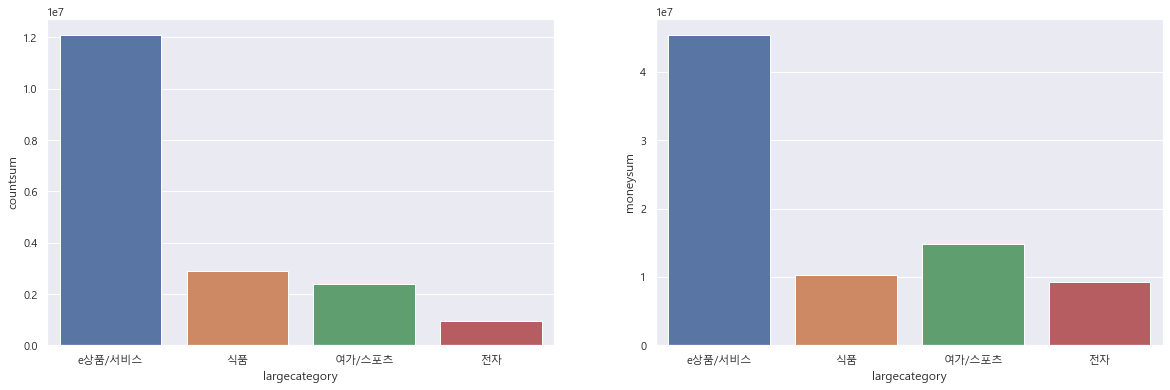

In [ ]:
grouped_t = data_t['매출금액(단위:만원)'].groupby(data_t['품목대분류명']).sum()
df_g_t = pd.DataFrame(grouped_t)
df_g_t.reset_index(inplace=True)
df_g_t.rename(columns={'품목대분류명':'largecategory', '매출금액(단위:만원)':'moneysum'}, inplace=True)

grouped_c = data_t['매출건수'].groupby(data_t['품목대분류명']).sum()
df_g_c = pd.DataFrame(grouped_c)
df_g_c.reset_index(inplace=True)
df_g_c.rename(columns={'품목대분류명':'largecategory', '매출건수':'countsum'}, inplace=True)

fig, ax = plt.subplots(figsize = (20, 6), ncols= 2)
sns.barplot(x = 'largecategory', y = 'moneysum', data = df_g_t,ax=ax[1])
sns.barplot(x = 'largecategory', y = 'countsum', data = df_g_c,ax=ax[0])

Text(0, 0.5, 'row 개수')

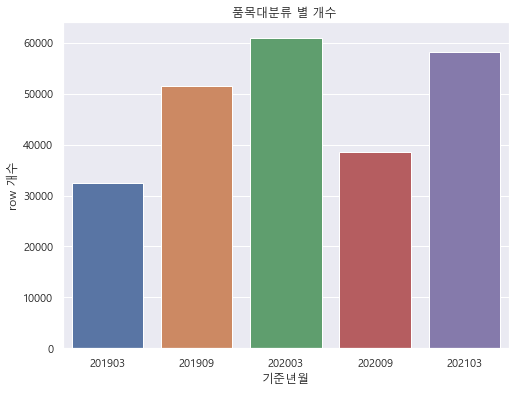

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
sns.countplot(x = '기준년월', data = data_t)
ax.set_title('품목대분류 별 개수 ')
ax.set_ylabel('row 개수')

Text(0.5, 1.0, '대분류별 매출금액 평균')

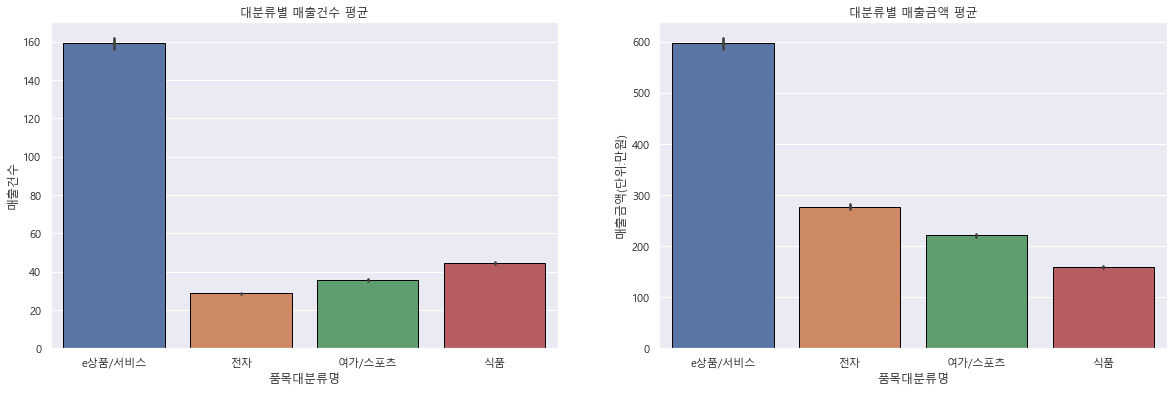

In [ ]:
#매출건수 평균 baplot
fig, ax = plt.subplots(figsize = (20, 6), ncols= 2)
sns.barplot(x = '품목대분류명', y = '매출건수', data = data_t, ax = ax[0], edgecolor = 'black')
ax[0].set_title('대분류별 매출건수 평균')

#매출금액 평균 barplot
sns.barplot(x = '품목대분류명', y = '매출금액(단위:만원)', data = data_t, ax = ax[1], edgecolor = 'black')
ax[1].set_title('대분류별 매출금액 평균')

# #건당 매출금액 평균 barplot
# sns.barplot(x = '품목대분류명', y = '건당 매출금액(단위:만원)', data = data_t, ax = ax[2], edgecolor = 'black')
# ax[2].set_title('대분류별 건당 매출금액 평균')

Text(0.5, 1.0, '대분류별 매출금액 평균')

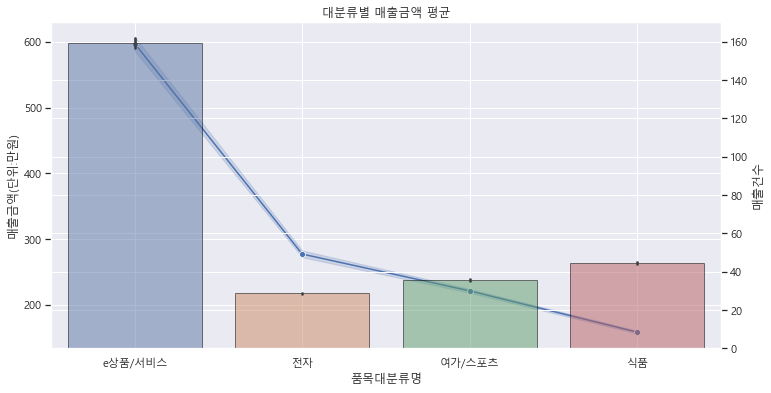

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(x = '품목대분류명', y = '매출금액(단위:만원)',data =data_t, marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(x = '품목대분류명', y = '매출건수', data = data_t, ax = ax2,edgecolor = 'black',alpha=0.5)
ax2.set_title('대분류별 매출금액 평균')

<AxesSubplot:xlabel='기준년월', ylabel='count'>

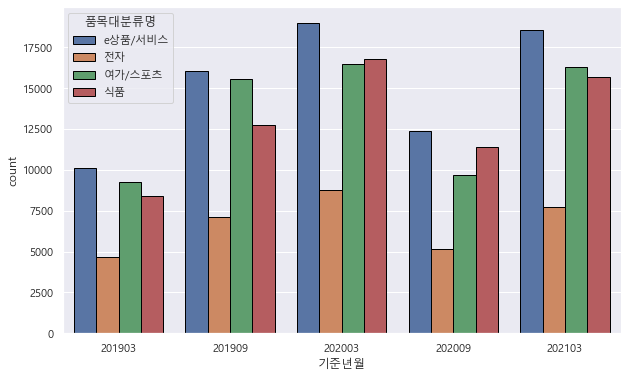

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (10 ,6))
sns.countplot(x = '기준년월', data = data_t, hue = '품목대분류명',edgecolor = 'black')

In [ ]:
data_t['매출건수'].groupby(data_t['품목대분류명']).sum()

품목대분류명
e상품/서비스    12109299
식품          2904327
여가/스포츠      2388971
전자           959948
Name: 매출건수, dtype: int64